In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from scipy.interpolate import interp1d
sys.path.append("../tools")
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 18

## Verdet Constant

In [66]:
from maths.algebra import  CurveFitting
cf = CurveFitting()

In [67]:
data = pd.read_csv("data.csv")

In [68]:
data["dtheta"] = data["theta2"]-data["theta1"]
data["dtheta"] = data["dtheta"]*np.pi/180

$$B = \mu_0 n i = 1.17286\times 10^{-2}\; T/A$$

In [69]:
data["B"] = data["current"]*1.17286e-2

$$\theta = \nu Bl\\$$
Creating a plot between $\theta$ and $B$ has a slope equal to
$$m = \nu l \Rightarrow \nu = \frac{m}{l}$$

In [70]:
data["dtheta"]

0    0.066323
1    0.054105
2    0.043633
3    0.034907
4    0.024435
5    0.019199
6    0.010472
Name: dtheta, dtype: float64

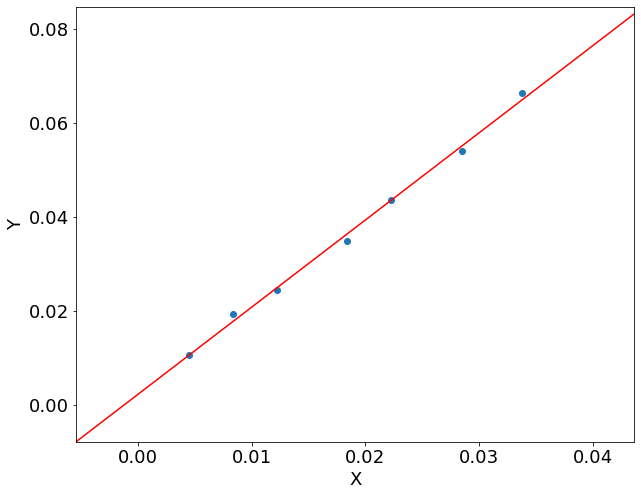

(array([0.00224647, 1.85487049]),
 {'r2': 0.9967432322886953, 'syx': 0.0012435805418286607})

In [71]:
params = cf.fit(data["B"], data["dtheta"], plot=True, order=1)
params

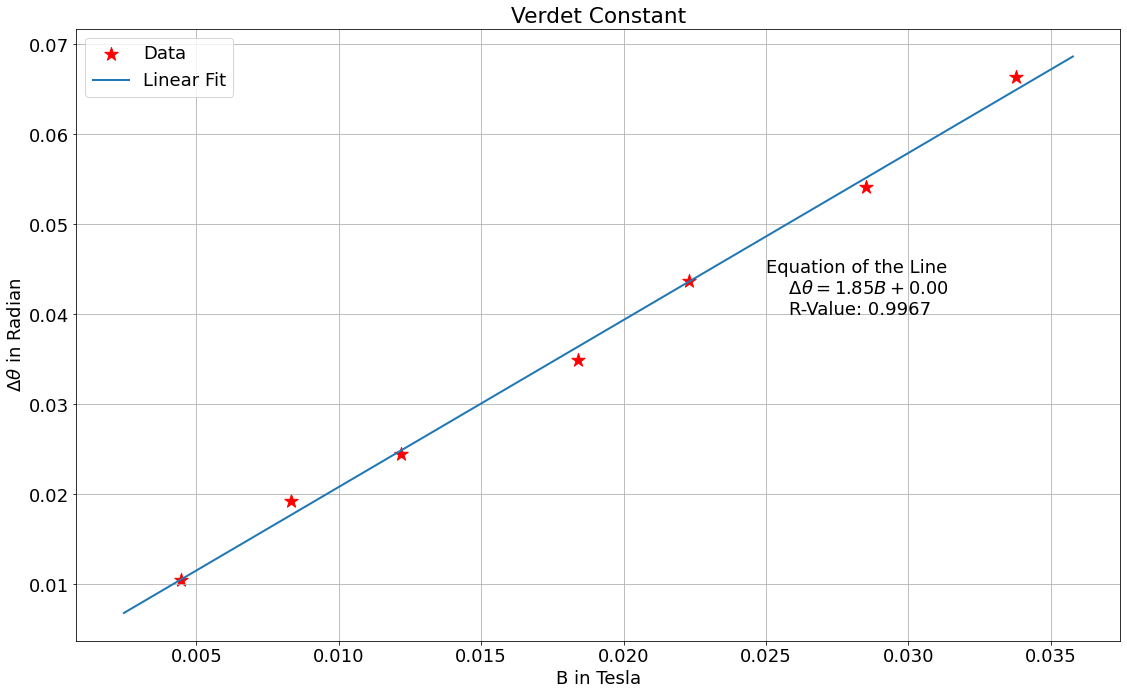

In [72]:
m = params[0][1]
c = params[0][0]
plt.figure(figsize=(16,10))
X = np.linspace(data["B"].min()-0.002, data["B"].max()+0.002, 100)
Y = m*X+c
plt.scatter(data["B"], data["dtheta"],  s=200, label="Data", c="r", marker="*")
plt.plot(X, Y, label="Linear Fit", lw=2)
plt.annotate(rf"""Equation of the Line
    $\Delta \theta = {m:.2f} B + {c:.2f}$
    R-Value: {params[1]["r2"]:.4f}""", (0.025, 0.04), )
plt.legend()
plt.xlabel("B in Tesla", )
plt.ylabel(r"$\Delta \theta$ in Radian", )
plt.grid()
plt.title(r"Verdet Constant", )
plt.xticks()
plt.tight_layout()
plt.savefig("verdet.jpg", dpi=200)
plt.show()

In [73]:
nu = params[0][1]/0.1
nu

18.548704857836018

In [74]:
data

,theta1,theta2,current,dtheta,B
0,323.8,327.6,2.88,0.066323,0.033778
1,323.8,326.9,2.43,0.054105,0.028500
2,323.8,326.3,1.90,0.043633,0.022284
3,323.8,325.8,1.57,0.034907,0.018414
4,323.8,325.2,1.04,0.024435,0.012198
5,323.8,324.9,0.71,0.019199,0.008327
6,323.8,324.4,0.38,0.010472,0.004457


## Malus Law

In [75]:
malus = pd.read_csv("malus.csv")

In [76]:
malus

,Angle,Current
0,19.9,73.0
1,25.3,72.9
2,30.8,70.5
3,35.3,67.8
4,40.1,64.5
...,...,...
67,355.7,68.0
68,360.4,70.2
69,365.2,71.3
70,370.6,72.0


In [77]:
zero_degree = 15.7
I0 = 73.4
malus["Angle"] = malus["Angle"]-zero_degree
malus["Current"] = malus["Current"]/I0

In [78]:
inter = interp1d(malus["Angle"], malus["Current"], kind='cubic')
X = np.linspace(malus["Angle"].min(), malus["Angle"].max(), 1000)
Y = inter(X)

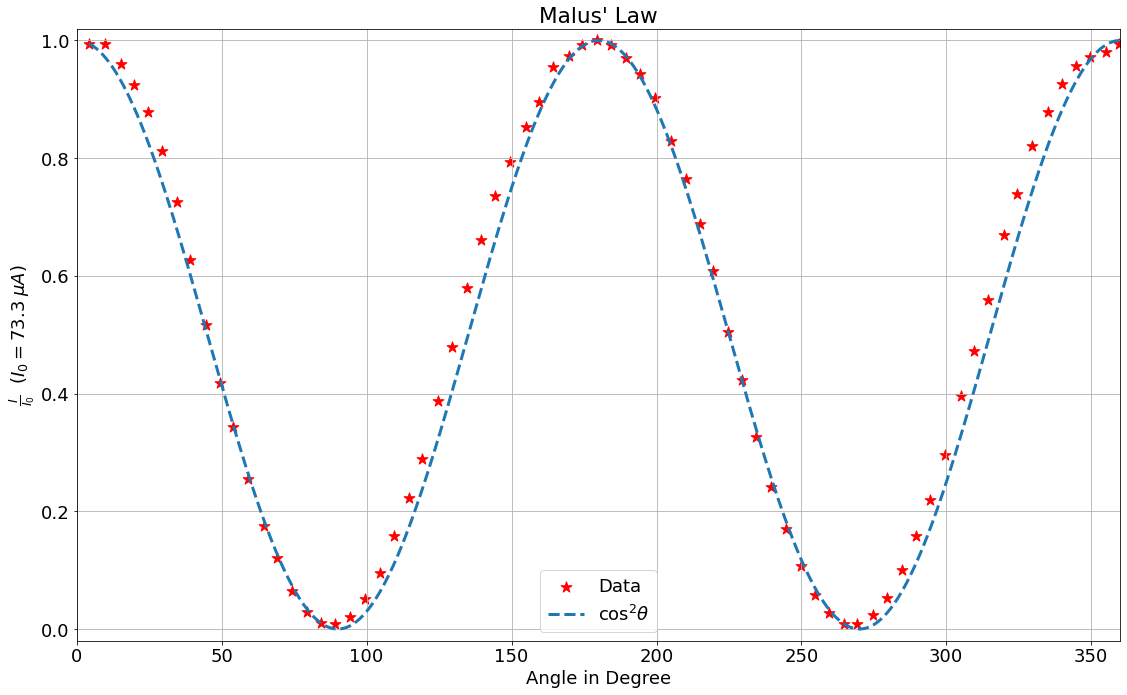

In [79]:
plt.figure(figsize=(16,10))
plt.scatter(malus["Angle"], malus["Current"], s=130, c="r", marker="*", label="Data")
# plt.plot(X, Y, label="Interpolated", lw=2)
plt.plot(X, np.cos(X*np.pi/180)**2, "--", lw=3, label=r"$\cos^2{\theta}$")
plt.xlim(0, 360)
plt.ylim(-0.02,1.02)
plt.xlabel("Angle in Degree")
plt.grid()
plt.ylabel(r"$\frac{I}{I_0}\;$ ($I_0=73.3\;\mu A$)")
plt.title("Malus' Law")
plt.legend(loc="lower center")
plt.tight_layout()
plt.savefig("malus.jpg", dpi=200)
plt.show()

In [80]:
len(malus)

72